<a href="https://colab.research.google.com/github/jcvasquezbetancur/DS-colab/blob/master/Notebook_Advanced_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MYCRA: Make Your Code gReat Again**#

#Lista de extensiones para Jupyter
**How to install in Colab** 
[=>stackoverflow](https://stackoverflow.com/questions/52292456/installing-jupyter-contrib-nbextension-on-google-colab)
But do any of themwork? only tqdm.

**How to install in jupyter**
[ndres blog](https://ndres.me/post/best-jupyter-notebook-extensions/)
>example with pip
```
  !pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master -q
  !pip install jupyter_nbextensions_configurator -q
  !jupyter contrib nbextension install --user
  !jupyter nbextensions_configurator enable --user
  !jupyter nbextension enable execute_time/ExecuteTime
```
> [more about using them](https://towardsdatascience.com/bringing-the-best-out-of-jupyter-notebooks-for-data-science-f0871519ca29)

Time
* Execute time: log lasta executed and duration
* tqdm:  progress bar for notebooks.
```
from tqdm import tqdm_notebook as tqdmn 
for i in tqdmn(range(10)):
  pass
```
 
Visual
* [Qgrid](https://qgrid.readthedocs.io/en/latest/): visually explore dataframes

> ```
pip install qgrid
jupyter nbextension enable --py --sys-prefix qgrid
# only required if you have not enabled the ipywidgets nbextension yet
jupyter nbextension enable --py --sys-prefix widgetsnbextension```
```


* Jupyther themes: more details [here](https://analyticsindiamag.com/what-are-jupyter-themes-and-how-to-apply-them/)
* Autopep8:  as below.
* nb_black: black for notebooks (NOT COLAB), %load_ext nb_black
* [RISE](https://github.com/damianavila/RISE) :Slideshow extension (NOT COLAB) 
* spellchecker
* Papermill : Parameterizing the notebook,useful for aws pipelines or so.
* Initializing cell: autorun certain cells at opening notebook
 
Colab ready
* varaible_ inspector
* goto error: someone ported it from colab tu jupyter [=>tds instructions](https://towardsdatascience.com/bringing-colab-to-a-jupyter-notebook-near-you-3f326f89fae7)
* Hinterland : autocompletions suggestions (Already in colab)
* Table of contents (1 or 2?) : already in colab
* Codefolding/hide code : already implemented in colab
* Collapsible headings : already implemented in colab

Others
* %debug:magic to check exception errordetails
* Nbdev: avoid copy-paste, convierte notebooks en package con documentacion y ejemplos

#Lista de extensiones mas importantes para VSCODE
(entre tanto se comparan  virtualenv, venv,pipenv, pyenv, poetry...)

* Some debug and info about autocomplete, formatting and mypy [vs-official](https://code.visualstudio.com/docs/python/editing)

**visual aspects**
* highlight-line: locate your current input line easily
* indented-block-highlighting: cool background for  your current block
* Moonlight: darkmode for painless eyes 
* Guides : keep you identation neat.
* bracket pair colorizer: colored matched pairs, orphans ,etc. 

**coding easyness**
* VS intellicode----is it the same next one?
* Path intellisence: the larger the stack,the stronger it helps!
* Intellisense: Code completions (import only what you need)
* Tabnine: a ML-trained autocomplete
* Auto-save :very practical indeed.
* file utils: create, divide , delete  files easily
* case-change: sweetapple to Sweet_Apple or whatever. 

**debugging**
* Code runner (=? arepl =? livecode): run excerpts virtually 
* arepl: genera automaticamente un visor sobre los valores actuales y los commandos print sin necesidad de ejecutar
* Livecode: same as above
* Pylint : La linterna de debug
* mypy: Type checking/static typing in Python (already in vscode)

**documenting and formatting**
* Better comments: remarks, Alerts,queries,TODO, organiza sus comentarios
* docstrings =? autodocstrings: genera automaticamente una plantilla de rellenar para la doc de las funciones que se están declarando. (requiere **"""** triple doble comilla)
* Code Spell Checker: for the latter 2 ones! 
* Beautify OR Prettier:  formatting your python with PEP  
* VS:Autoformatting (Black  for better readability). see [vs-doc](https://code.visualstudio.com/docs/python/editing)

**Others**
* Remote-containers y Docker: it's in the name

#Ejemplos teoricos de advanced tools.

## URL, PDF y VIDEO insertion

```
# Url or PDF
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/HTTPS', width=800, height=450)
IFrame('https://arxiv.org/pdf/1406.2661.pdf', width=800, height=450)
#youtube-video
from IPython.display import YouTubeVideo
YouTubeVideo('mJeNghZXtMo', width=800, height=300)
```

## Usar numexpr para evaluacion acelerada de operaciones
* util para arrays de 10^5 o superiores.
* Pandas.eval() hace en teori uso de esta función,pero ver el benchmark aqui abajo, parecen no ser equivalentes?


# Use Pandas or Numpy  functions?- depends on the task!
* Tips to make your code faster with standardlibs  no extra manips included

**Results Summary** (Pandas 0.20 version):

Taken from mm-mansour's [=> github link](https://https://github.com/mm-mansour/Fast-Pandas#2---pandas-vs-numpy)
<p><img alt="Benchmark summary" height="390px" src="https://camo.githubusercontent.com/8fcd3902f5b1e73cef16b8dc94711623fba5585c/68747470733a2f2f692e696d6775722e636f6d2f6549633052676c2e706e67" align="left" hspace="10px" vspace="0px"></p>

  * [1] The method df.values is very fast; however, it consumes a lot of memory. Itertuples comes second in performance and is recommended in most cases.
  * [2] As opposed to pd.eval method.
  * [3] Unless the dataset has NaNs, then use pandas functions.
  * [4] No significant statistical difference was found; nevertheless, pd.median is recommended.

**Tested on:**

* CPU: Intel(R) Core(TM) i7-4770 CPU @ 3.40GHz,  RAM: 32 GB
* Versions: - Python: 3.6.0, pandas: 0.20.3, numpy: 1.13.3, numexpr: 2.6.2


# Usar Numba y Pythran (forget about Cython)
* Numba parece facil con @jit decorator.
[official 5-minute guide](https://numba.pydata.org/numba-doc/latest/user/5minguide.html) y tambien ver este [blog en detalle con Notebook](https://towardsdatascience.com/speed-up-your-algorithms-part-2-numba-293e554c5cc1)
* Pythran es un Python-to-C++ translator, no requiere mucho mas trabajo pues se deja usar at high-level como decorator.
[ejemplo practico](https://flothesof.github.io/optimizing-python-code-numpy-cython-pythran-numba.html) y ver como confirgurarlo en [otro notebook](https://perso.univ-rennes1.fr/pierre.navaro/tag/pythran.html#Pythran)
* Si bien pandas explica en su web oficial como optimizar performance a través del uso tanto de Numba como Cython, no aconsejaria Cython,  dato que Pythran ofrece mejores resultados con un uso mas simplificado y directo. Igual incluyo el link a la guia de Pandas al respecto. [enlace](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html) 
<p>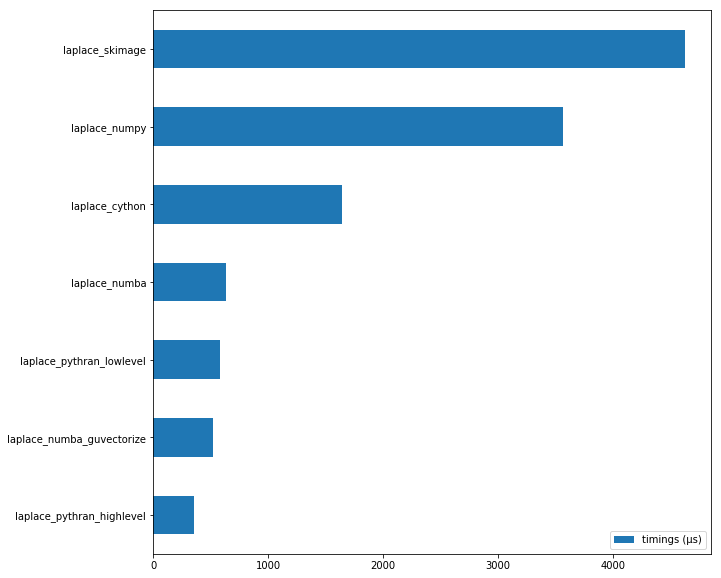</p>

# Generar un iterador para visualizar secciones de los datos.
* Uso muy práctico y se actualiza con Crtl+Enter en lugar de Shift-Enter

[ejemplo practico aqui](https://towardsdatascience.com/7-advanced-tricks-in-pandas-for-data-science-41a71632b5d9)

 ## Usar la libreria sklearn_pandas
 * Para usar mapper y facilitar la interaccion entre modulos sin  transfom column

##Clonar el git para usar funciones de código y mantener light el notebook

```
! git clone https://bitbucket.org/yourUsername/yourRepository.gitimport sys
sys.path.append('yourRepository')
from filename import FunctionName
```

## EDA tutorial with notebook
* By C. Mawer at Pycon2017 [github-repo](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md)

#Ejemplos practicos de advanced tools -

In [ ]:
# Url or PDF
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/HTTPS', width=600, height=250)
#IFrame('https://arxiv.org/pdf/1406.2661.pdf', width=400, height=250)

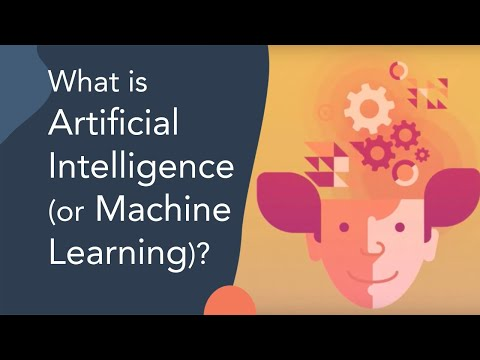

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('mJeNghZXtMo', width=600, height=200)

##Setup

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

##Quick Setup COLAB-GDrive

In [ ]:
from google.colab import drive  # solo importamos submodulo drive.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Benchmarking I (with perfplot): 
##Case study=> pandas: query, eval, numexpr

In [ ]:
!pip install perfplot --quiet

100%|██████████| 22/22 [01:00<00:00,  2.73s/it]


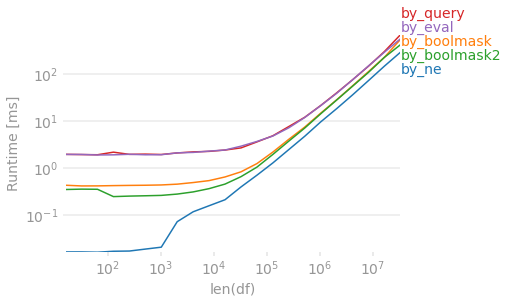

In [ ]:
#Benchmark query, eval, numexpr
import numexpr
import pandas as pd
import numpy as np
import perfplot
np.random.seed(125)

def by_ne(x):
    x = x.A.values
    return x[numexpr.evaluate('(x > 5)')]

def by_boolmask(x):
    return x[x.A > 5]

def by_boolmask2(x):
    return x[x.A.values > 5]  

def by_query(x):
    return x.query('A > 5')

def by_eval(x):
    return x[x.eval('A > 5', engine='numexpr')]


def make_df(n):
    df = pd.DataFrame(np.random.randint(10, size=n), columns=['A'])
    return df

perf_test=0
if( perf_test):
  out = perfplot.show(
    setup=make_df,
    kernels=[by_ne, by_boolmask, by_boolmask2, by_query, by_eval],
    n_range=[2**k for k in range(4, 26)],
    logx=True,
    logy=True,
    equality_check=False,  
    xlabel='len(df)',
    time_unit='ms')

# Benchmarking II (with Benchmarker.py):
## Case study=> pandas: query, eval, numexpr

* Check more about benchmarker.py class on  mm-mansour's [=> github link](https://https://github.com/mm-mansour/Fast-Pandas#2---pandas-vs-nump

Following import is a file taken from 
*https://github.com/mm-mansour/Fast-Pandas/blob/master/Benchmarker.py*

Note, there is a benchmarker module in Pypi, but is cumbersome to use.

In [ ]:
!mkdir exports

Benchmarking function:  by_ne
	Testing with a dataframe of size:  100
	Result (seconds):  1.723061949996918e-05
	Testing with a dataframe of size:  1000
	Result (seconds):  1.9582764300002963e-05
	Testing with a dataframe of size:  10000
	Result (seconds):  0.00011502310900004887
	Testing with a dataframe of size:  100000
	Result (seconds):  0.0012285792479997326
	Testing with a dataframe of size:  1000000
	Result (seconds):  0.004223581440000999
	Testing with a dataframe of size:  10000000
	Result (seconds):  0.04449447810002312
	Testing with a dataframe of size:  100000000
	Result (seconds):  0.43998586299994713
Benchmarking function:  by_boolmask
	Testing with a dataframe of size:  100
	Result (seconds):  0.0005390431679000358
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0004744285572000081
	Testing with a dataframe of size:  10000
	Result (seconds):  0.0006309050889999526
	Testing with a dataframe of size:  100000
	Result (seconds):  0.0028741216949997577
	Testing

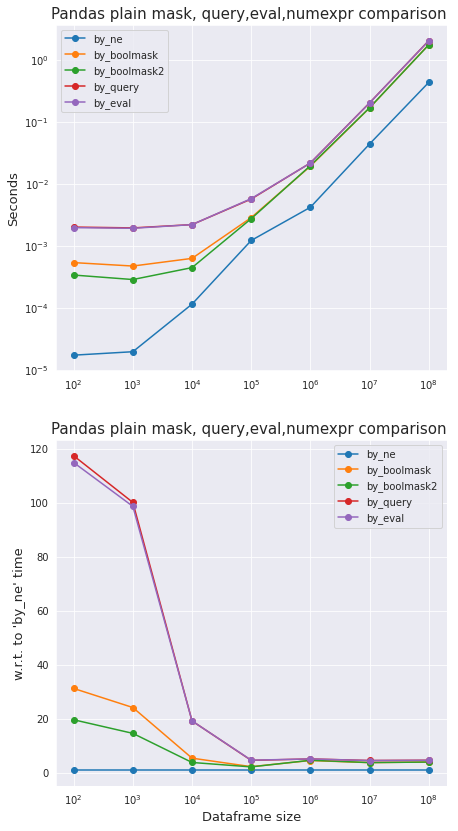

In [ ]:
#Benchmark query, eval, numexpr
from other_file import Benchmarker
import numexpr
import pandas as pd
import numpy as np

np.random.seed(125)

def by_ne(x):
    x = x.A.values
    return x[numexpr.evaluate('(x > 5)')]

def by_boolmask(x):
    return x[x.A > 5]

def by_boolmask2(x):
    return x[x.A.values > 5]  

def by_query(x):
    return x.query('A > 5')

def by_eval(x):
    return x[x.eval('A > 5', engine='numexpr')]

bench_test=0
if( bench_test):
  params = {
    "df_generator": 'pd.DataFrame(np.random.randint(1, df_size, (df_size, 2)), columns=list("AB"))',
    "functions_to_evaluate": [by_ne, by_boolmask, by_boolmask2, by_query, by_eval],
    "title": "Pandas plain mask, query,eval,numexpr comparison ",
  }
  benchmark = Benchmarker(**params)
  benchmark.benchmark_all()
  benchmark.print_results()
  benchmark.plot_results()


## Loading de COVID file

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/COVID.csv"
import numpy as np

df=pd.read_csv(path)
#df.head(20)
#print(df.departamento.value_counts())

#Advanced Tricks

##Reporting DATASET quality (I):  pandas-profiling 
* Install on Colab lastest version
* Import and run a report.
* Translated the report to a notebook

[Official use examples](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/examples.html#showcasing-specific-features)

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --quiet

     \ 48.4MB 638kB/s
     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 604kB 10.6MB/s 
     |████████████████████████████████| 3.1MB 40.8MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 296kB 48.4MB/s 


In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
report_test=0
if(report_test):
  profile = ProfileReport(df,minimal=False, progress_bar=True)

In [ ]:
if(report_test):
  profile.to_notebook_iframe()

## Reporting DATASET quality(II): missingno library

Great tool => [missingno](https://github.com/ResidentMario/missingno)


##Exploratory Data Analisis(EDA) cheet-sheet

Great short tutorial from pycon2017 (but not in their github repository)  
[link at cmawer's github](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md)

##Plotting on maps with colored statistics: Chorophet by folium library
* [official quickstart](https://python-visualization.github.io/folium/quickstart.html)
* For the data-loading and GeoJson longer version look this [oficial detailed example notebook](https://github.com/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb)

* [A tds blog](https://towardsdatascience.com/choropleth-maps-with-folium-1a5b8bcdd392)

###packages Setup 

In [ ]:
!pip install requests --quiet
!pip install folium --quiet

### Loading folium and Main country location

In [ ]:
import folium
mbase = folium.Map(location=[6.230833, -75.590553],width='70%',zoom_start=6)
print(mbase)
#to display map in notebook un comment the next line
#m
#m.save('index.html')

### Cargando una archivo JSON con los departamentos (geodatabase) 

In [ ]:
import json
import requests
## loading json file with department data
#----------------------------------------------------

#preparing url paths to databases
#se usan un json small,pero el database tienen un json de 20MB departamento detallados
#url = 'https://www.acolgen.org.co/wp-content/uploads/geo-json/'
#state_geo = f'{url}/departamentos-small.geo.json'
#state_geo2 = f'{url}/colombia.geo.json'
#geo_json_data = json.loads(requests.get(state_geo).text)

#---my---local version
path = "/content/drive/My Drive/Colab Notebooks/"
fname1 = "departamentos-small.geo.json"
fname2 = "colombia.geo.json"

with open(path+fname1, mode='r') as f:
  content=f.read()
  geo_json_data_local = json.loads(content)
with open(path+fname2, mode='r') as f:
  content=f.read()
  geo_json_data_local2 = json.loads(content)

#----------------
## showing the load geodata
m1 = folium.Map(location=[6.230833, -75.590553],width='70%',zoom_start=6) 
folium.GeoJson(geo_json_data_local2).add_to(m1)
m1

### Prepare dataframe to be plot on map
* Se necesitan 2 columnas (dpto y su acumulado) en un dataframe para graficarlos
* Como los casos de covid.csv son individuales, primero sacamos estadistica por departamento ( groupby aqui pero tambien con value_counts() se obtiene una serie que debe volverse dataframe nuevamente.


In [ ]:
sr_bydept= df.groupby('departamento')['id_de_caso'].count() #this outputs on a series object
df_bydept=sr_bydept.to_frame()# putting it back to datraframe
df_bydept.reset_index(inplace=True) # to make the dataseries index a true column
df_bydept['departamento'] = df_bydept['departamento'].astype(str) # because reset_index creates Dtype=object not String
#print(df_bydept.values)

### Verify your geo-related column has equal strings as the JSON file 
* En este caso col 'Departamentos' del csv no  es compatible totalmente con la geodatabase del json format.
1. Remover los no existentes en eljson de la columna. Note que si aparece el lugar en ambas bases pero no tiene datos se puede manejar con nan_fill_color='black'
2. Verificar identidad de los keys: upper,lower etc.

In [ ]:
#remove inexistent geoson locations....just for know.
state_dropable = ["Cartagena D.T. y C.", 
                  "Barranquilla D.E.", 
                  "Buenaventura D.E.",
                  "Santa Marta D.T. y C."]
df_bydept=df_bydept[~df_bydept['departamento'].isin(state_dropable)] 
#print(df_bydept.values)

In [ ]:
# translate names with accents (2 levels of solutions below)

#----------- DEV SOLUTION: best manual but costumizable solution (ñ)
remove_characters = ["á","é","í","ó","ú","ñ"]
subs_characters   = ["a","e","i","o","u","n"]

csvnames=df_bydept.departamento.values
newnames=[]

for city in csvnames:
  for oldchar,newchar in zip(remove_characters,subs_characters):
    if(oldchar in city):
      city.replace(oldchar, newchar)
  newnames.append(city)

#----------PRO SOLUTION: a.k.a. best assisted proof safe solution

# accented_string is of type 'unicode'
#import unidecode
#csvnames=df_bydept.departamento.values
#np.where(csvnames == "Nariño", "Narino", csvnames) # replace Narino
#csvnames.[unidecode.unidecode(city) for city in csvnames]
#newnames= [unidecode.unidecode(city) for city in csvnames]

#-------------wrapping for all solutions and puttin it back to dataframe
#---create a dictionary old:new and replace values on the df
newnames= np.array(newnames)
np.where(newnames == "Bogota D.C.", "SANTAFE DE BOGOTA D.C", newnames) # replace Bogota
city_dict= dict(zip(csvnames,newnames))
df_bydept.departamento.replace(city_dict, inplace=True)
#print(df_bydept.values)

### Long version => con  folium.GeoJson
* Preparar la escala de color (palette) con los rangos de los datos
* Preparar el diccionario de color
* Estas listo para geoplotear !

####Prepare color palette

In [ ]:
from branca.colormap import linear
colormap = linear.BuPu_09.scale(
    df_bydept.id_de_caso.min()+100,
    df_bydept.id_de_caso.max())

print(colormap(10.0))

colormap.to_step(index=[100,200,400,800,1600,2000,3000,4000,13000])

#f7fcfdff


#### Converting the dataframe into a dictionary

In [ ]:
contagios_dict = df_bydept.set_index('departamento')['id_de_caso']
#print(contagios_dict)
#color_dict = {key: colormap(unemployment_dict[key]) for key in unemployment_dict.keys()}

#### Finally geoplotting !

In [ ]:
m2 = folium.Map(location=[6.230833, -75.590553],width='70%',zoom_start=6)

folium.GeoJson(
    geo_json_data_local2,
    name='Contagios Covid19',
    style_function=lambda feature: {
        'fillColor': colormap(contagios_dict[feature['properties']['NOMBRE_DPT']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m2)

folium.LayerControl().add_to(m2)
colormap.caption = 'number cases'
colormap.add_to(m2)
m2


### Short Version: With Choropleth
* Requires your dataframes + json have matching keys 

In [ ]:
df_bydept.iloc[17,1]= float('nan')
#print(df_bydept.values)

m3= folium.Map(location=[6.230833, -75.590553],width='70%',zoom_start=6)
folium.Choropleth(
    geo_data=geo_json_data_local2,
    name='choropleth',
    data=df_bydept,
    columns=['departamento','id_de_caso'],
    key_on= 'feature.properties.NOMBRE_DPT',
    bins= [1,100,400,800,1600,2500,4000,12900],
    fill_color='YlGnBu',
    fill_opacity=0.8,
    line_opacity=0.4,
     nan_fill_color='brown',
    nan_fill_opacity=0.9,
    legend_name='Casos totales',
    highlight=True
).add_to(m3)

folium.LayerControl().add_to(m3)
#show it 
m3

##Presentacion de Interpretabilidad de modelos

In [ ]:
import numpy as np
coeff=2*np.random.rand(7) -1
variables= ['var'+str(i) for i in range(7)]
pd.DataFrame({
    'variable': variables,
    'coefficient': coeff
}) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['grey', 'lightblue'], align='zero')

## Pipes for readability
* f(g(h(df))  =>  df.pipe(h).pipe(g).pipe(h)

In [ ]:
from google.colab import drive  # solo importamos submodulo drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/titanic_train.csv"
df=pd.read_csv(path)
df.info()

def female_proportion(dataframe):
    return (dataframe.Sex=='female').sum() / len(dataframe)

#female_proportion(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


No piped, no fun

In [ ]:
df2= df.merge(
    df.loc[
        df.Ticket.isin(
            df.Ticket.value_counts().loc[
                df.Ticket.value_counts()>1
            ].index
        )
    ].groupby('Ticket').apply(female_proportion) \
     .reset_index().rename(columns={0:'proportion_female'}),
     how='left', on='Ticket'
)

My piped version

In [ ]:
##-----TODO

# tqdm for pandas

In [ ]:
!pip install https://github.com/tqdm/tqdm/archive/master.zip --quiet

     / 573kB 2.1MB/s


In [ ]:
from tqdm import notebook
notebook.tqdm().pandas()

In [ ]:
female_proportion(df)

0.35241301907968575

In [ ]:
df.groupby('Ticket').progress_apply(female_proportion)

Ticket
110152         1.000000
110413         0.666667
110465         0.000000
110564         0.000000
110813         1.000000
                 ...   
W./C. 6608     0.750000
W./C. 6609     1.000000
W.E.P. 5734    0.000000
W/C 14208      0.000000
WE/P 5735      0.500000
Length: 681, dtype: float64

## qcut for quantile categories 

In [ ]:
path = "sample_data/california_housing_train.csv"
df=pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
 9   q_pop               17000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.3 MB



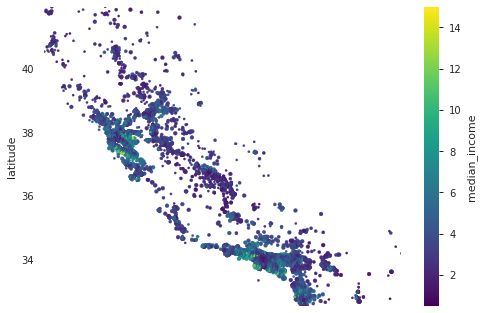

In [ ]:
#@title **hint**
df['q_pop']=pd.qcut(df.population ,4,labels=False)
df.info()
df.plot.scatter(x='longitude', y='latitude',s=list(df.q_pop*5),c='median_income',colormap='viridis') 

##choroplethin bokeh  and plotly implemented in  another notebook
[link Colab-notebook]()
[Choropleth-maps quickstart](https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps)

# Interesting radial graphs
![DataScience outfits](http://businessoverbroadway.com/wp-content/uploads/2017/10/ProficiencybyDataScienceRole.png)